## Launching on IonQ

Import libraries

In [29]:
import numpy as np
import pennylane as qml
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from pennylane import numpy as pnp

import jax
import jax.numpy as jnp
from pennylane import numpy as pnp
import matplotlib.pyplot as plt
from pennylane_qiskit import AerDevice
from pennylane_ionq import ops
from qiskit_aer import AerSimulator


jax.config.update("jax_enable_x64", True)

import optax


Circuit function layer thing

In [30]:
def strong_layer(parameters):
    #circuit = strong_layer(n_qubits, params, 6)
    #measurements = qml.from_qiskit(circuit)()
    param_index=0
    for i in range(6):
        for qubit in range(n_qubits):
            qml.RX(parameters[param_index], wires=qubit)
            param_index += 1
            qml.RY(parameters[param_index], wires=qubit)
            param_index += 1
            qml.RZ(parameters[param_index], wires=qubit)
            param_index += 1
        # Apply CNOT gates for entanglement
        for qubit in range(n_qubits - 1):
            qml.CNOT(wires=[qubit, qubit + 1])
        qml.CNOT(wires=[n_qubits - 1, 0])
        #for qubit in range(n_qubits):
        #    qml.BitFlip(0.05, wires=qubit)
    return qml.probs(wires=range(n_qubits))

Generate Bars and Stripes dataset

In [31]:
def get_bars_and_stripes(n):
    bitstrings = [list(np.binary_repr(i, n))[::-1] for i in range(2**n)]
    bitstrings = np.array(bitstrings, dtype=int)

    stripes = bitstrings.copy()
    stripes = np.repeat(stripes, n, 0)
    stripes = stripes.reshape(2**n, n * n)

    bars = bitstrings.copy()
    bars = bars.reshape(2**n * n, 1)
    bars = np.repeat(bars, n, 1)
    bars = bars.reshape(2**n, n * n)
    return np.vstack((stripes[0 : stripes.shape[0] - 1], bars[1 : bars.shape[0]]))


n = 3
size = n**2
n_qubits = size
data = get_bars_and_stripes(n)

bitstrings = []
nums = []
for d in data:
    bitstrings += ["".join(str(int(i)) for i in d)]
    nums += [int(bitstrings[-1], 2)]
probs = np.zeros(2**size)
probs[nums] = 1 / len(data)



Define the device used

In [32]:
dev = qml.device("ionq.simulator", wires=n_qubits, api_key="iRpYWZL97FtKxQRHyGZZU5lgbnhEwAZj")

The choosing of the circuit

In [33]:
@qml.qnode(dev)
def circuit(parameters):
    return strong_layer(parameters)


In [34]:
params = np.array([
0.001377390372505572 ,
-0.001999262186840033 ,
0.04046959306546333 ,
-0.005297571383147046 ,
0.00037269556541783737 ,
0.9226295446826264 ,
-0.33662543042338455 ,
0.7043103481336725 ,
0.6458647723002002 ,
1.1718505870670464 ,
0.019362355427018616 ,
0.583793392917372 ,
0.16494312208339562 ,
0.1742344097695041 ,
-0.5382751726171358 ,
0.05338396964571234 ,
1.9424333268549603 ,
1.1899704601660481 ,
0.0005084214981475484 ,
-0.005627826289598739 ,
0.993301659524841 ,
1.87803773560565 ,
0.37315145558648605 ,
-0.27654911289889783 ,
0.3348705247789034 ,
1.2433540003579557 ,
0.27728823868016017 ,
-1.3301181278444063 ,
0.15443010304495328 ,
0.6971406906054071 ,
0.0022441808809481605 ,
0.0019813852549384428 ,
1.389140373683446 ,
-0.27623600816722543 ,
-0.034408127205056566 ,
1.2771657413575521 ,
-0.006480319246842373 ,
0.1306584342455894 ,
-0.16418513979419927 ,
-0.0030231138127587865 ,
-0.01255390171148929 ,
0.38426870828054044 ,
0.006538809872463052 ,
0.000329325294573132 ,
-0.46540047262808937 ,
0.004471692616281485 ,
-0.0015815675676463445 ,
0.02295744494728625 ,
0.5721478578637159 ,
0.6266197817708228 ,
-0.13851729060328297 ,
2.073766995638341 ,
-0.5483234262398725 ,
0.5571204722968778 ,
1.5695674853812447 ,
0.10704808917115911 ,
1.5691431129283306 ,
0.9377769376434567 ,
1.5814461766045507 ,
0.9420642936591638 ,
1.462115391364119 ,
1.5518838365313843 ,
-0.2983377412895483 ,
0.617667018309416 ,
1.3177183100457106 ,
0.5270621875707164 ,
1.573866723335116 ,
0.66322793992273 ,
1.5744807234840876 ,
0.5359207496372405 ,
1.4044807150570477 ,
1.679306507804449 ,
1.5728989205598123 ,
0.919978491035601 ,
1.606931724157139 ,
0.6403051456190221 ,
1.5016651464079118 ,
-0.034995699933223316 ,
1.5755077087585228 ,
0.4948680752138462 ,
0.003631775924936322 ,
0.8675576936984025 ,
0.0823745758064432 ,
-0.2026816214648035 ,
1.3463177906294543 ,
2.0853273929872462 ,
1.5212228800166283 ,
1.5843489217816424 ,
0.005598512613026138 ,
0.46953292073907354 ,
-0.42475903000978055 ,
-0.0009504140125371722 ,
-0.0037940662393192506 ,
0.4841383935574947 ,
-0.00495330275192321 ,
1.5695870366157227 ,
1.3244568043806926 ,
-0.0012302093972664044 ,
1.569817790997046 ,
0.8279551227459333 ,
1.3802902917864046 ,
1.1083244765749347 ,
1.5676681971298025 ,
0.2657932551979358 ,
-0.002404624143142717 ,
0.04577055134568008 ,
1.4259212695430683 ,
0.04462051134667632 ,
0.691296981204593 ,
0.05263101084061516 ,
1.7416730834988048 ,
0.06492673049170382 ,
1.3831718882344248 ,
-1.5455306276002567 ,
-0.8624349991659762 ,
1.5671256112603829 ,
0.6473397956194876 ,
0.0073474804863370696 ,
0.002375529030307216 ,
1.984039614691672 ,
0.8283951198192256 ,
1.5687845196446897 ,
-0.0760095156442814 ,
-0.031848965673509096 ,
-0.0007945674909592386 ,
-0.12371605857294328 ,
-0.001738485984887722 ,
0.0006909636600816935 ,
-0.2559470801894263 ,
0.16284636639194539 ,
1.568127002211481 ,
0.4707028299506062 ,
0.0017500312125771473 ,
0.0008935179747955782 ,
1.490868736582672 ,
-0.1769854804649728 ,
1.0958996912660464 ,
0.5858078100000571 ,
1.0803398176920023 ,
0.013268801220063867 ,
0.5778812706048962 ,
0.0021521206963532992 ,
-0.0008312762589929326 ,
0.20483962411131768 ,
-0.5645017280140732 ,
0.7646676788877705 ,
0.8876417729805933 ,
0.17497169553190406 ,
-0.08902201755259044 ,
0.553020311683337 ,
0.0018085586307276483 ,
-0.00032090006605985246 ,
0.7060105290484054 ,
-0.2586420647377862 ,
0.6535914385176157 ,
0.7521589107861408 ,
-0.06748704235577437 ,
0.152703979049812 ,
0.8869961176013319 ,
-0.0010624061539798106 ,
0.0048523523911730045 ,
0.9008214118418684 ,
0.49594257228640315 ,
])



Launch on IONQ

In [35]:
optimal_params=params
output_probs = circuit(optimal_params)

print(output_probs)

[6.70592590e-02 6.42000000e-09 5.37000000e-07 4.05640000e-05
 4.50296000e-04 8.81000000e-08 3.54000000e-07 6.61289190e-02
 1.07000000e-09 5.73000000e-08 2.69000000e-07 1.73000000e-10
 1.25000000e-12 4.50000000e-07 3.05000000e-07 1.25000000e-09
 3.39000000e-10 1.37000000e-08 1.34600000e-06 1.97000000e-10
 6.14000000e-11 5.48000000e-07 3.82000000e-08 8.42000000e-11
 5.21970000e-05 2.43000000e-07 1.72000000e-07 6.82634000e-04
 1.25755000e-04 3.80000000e-07 1.00000000e-07 2.56760000e-05
 3.08990000e-05 2.34000000e-08 2.83000000e-07 3.04527900e-03
 1.12575800e-03 2.52000000e-07 2.96000000e-08 2.49241000e-04
 1.08000000e-10 6.70000000e-07 1.44000000e-06 5.45000000e-08
 2.94000000e-09 1.46000000e-07 1.61000000e-07 2.21000000e-10
 1.25000000e-10 3.62000000e-07 7.35000000e-07 1.39000000e-10
 5.75000000e-10 6.05000000e-07 1.60000000e-07 3.03000000e-09
 6.62166560e-02 4.64000000e-08 1.32000000e-07 3.18417000e-04
 1.80583000e-04 1.27000000e-07 9.09000000e-08 6.63641710e-02
 2.47000000e-08 5.430000

Plot histograms

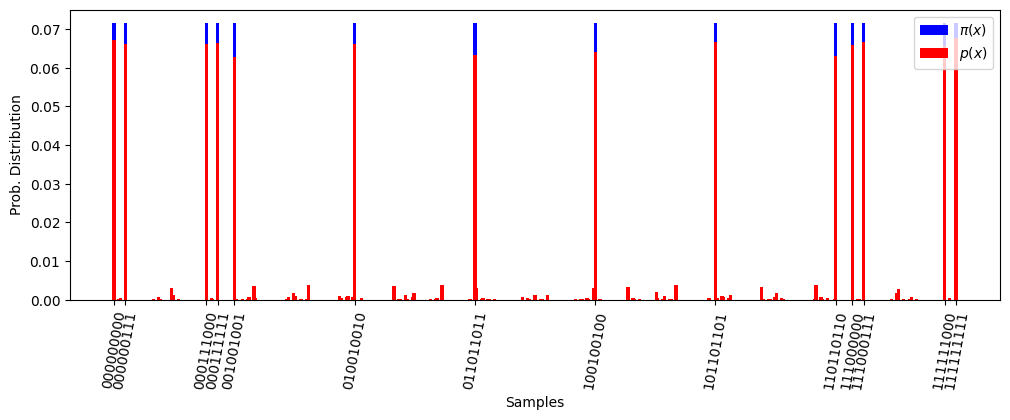

In [36]:
probs = np.zeros(2**size)
probs[nums] = 1 / len(data)

plt.figure(figsize=(12, 5))
plt.bar(np.arange(2**size), probs, width=2.0, label=r"$\pi(x)$", color='blue')
plt.bar(np.arange(2**size), output_probs, width=2.0, label=r"$p(x)$",color='red')

plt.xticks(nums, bitstrings, rotation=80)

plt.xlabel("Samples")
plt.ylabel("Prob. Distribution")
plt.legend(loc="upper right")
plt.subplots_adjust(bottom=0.3)
plt.show()

In [37]:
Accu

0.9173508924937648


In [37]:
acr=0
for i in nums:
    acr+=output_probs[i]
print(acr)

0.9173508924937648
